Reduccion de ruido en una señal via autocorrelación

Computational problems of physics
Gottlieb & Landau, Taylor & Francis

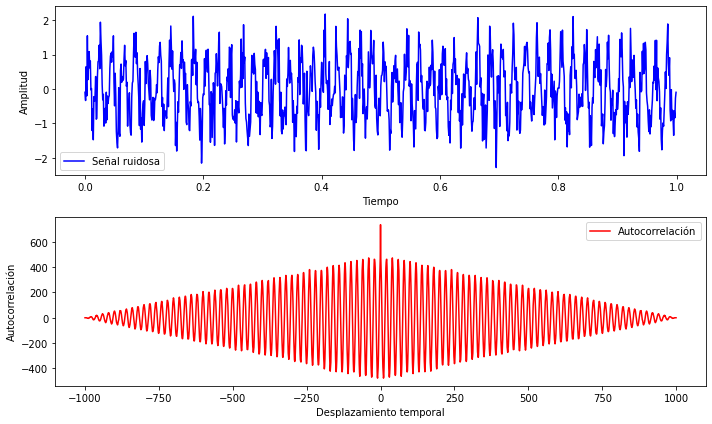

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generar una señal de audio con ruido
fs = 1000  # Frecuencia de muestreo
t = np.linspace(0, 1, fs, endpoint=False)  # Vector de tiempo de 1 segundo
clean_signal = np.sin(2 * np.pi * 50 * t)  # Señal sinusoidal limpia
noise = 0.5 * np.random.randn(len(t))  # Ruido gaussiano
noisy_signal = clean_signal + noise  # Señal con ruido

# Calcular la autocorrelación de la señal ruidosa
autocorr = np.correlate(noisy_signal, noisy_signal, mode='full')

# Plot de la señal ruidosa y su autocorrelación
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(t, noisy_signal, color='blue', label='Señal ruidosa')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(np.arange(-len(noisy_signal) + 1, len(noisy_signal)), autocorr, color='red', label='Autocorrelación')
plt.xlabel('Desplazamiento temporal')
plt.ylabel('Autocorrelación')
plt.legend()

plt.tight_layout()
plt.show()


integral numerica
promedio del ruido


In [2]:
import numpy as np

# Definir dos secuencias de datos
a = np.array([1, 2, 3, 4, 5])
v = np.array([0, 1, 0.5])

# Calcular la correlación entre las dos secuencias en modo 'full'
correlation = np.correlate(a, v, mode='full')

print("Correlación completa:", correlation)

# Calcular la correlación en modo 'valid'
correlation_valid = np.correlate(a, v, mode='valid')

print("Correlación válida:", correlation_valid)

# Calcular la correlación en modo 'same'
correlation_same = np.correlate(a, v, mode='same')

print("Correlación centrada:", correlation_same)


Correlación completa: [0.5 2.  3.5 5.  6.5 5.  0. ]
Correlación válida: [3.5 5.  6.5]
Correlación centrada: [2.  3.5 5.  6.5 5. ]


In [3]:
import numpy as np

def autocorrelation(signal):
    # Invertir la señal en el tiempo
    inverted_signal = np.flip(signal)
    
    # Convolver la señal consigo misma
    autocorr = np.convolve(signal, inverted_signal, mode='full')
    
    return autocorr

# Ejemplo de uso
signal = np.array([1, 2, 3, 4, 5])
autocorr = autocorrelation(signal)
print("Autocorrelación:", autocorr)


Autocorrelación: [ 5 14 26 40 55 40 26 14  5]


In [12]:
import numpy as np

# Tamaño más cercano con potencia de 2
size = 2 ** np.ceil(np.log2(2 * len(data) - 1)).astype('int')

# Varianza
var = np.var(data)

# Datos normalizados
ndata = data - np.mean(data)

# Calcular la FFT
fft = np.fft.fft(ndata, size)

# Obtener el espectro de potencia
pwr = np.abs(fft) ** 2

# Calcular la autocorrelación a partir de la FFT inversa del espectro de potencia
acorr = np.fft.ifft(pwr).real / var / len(data)

# Mostrar la autocorrelación
print(acorr)



NameError: name 'data' is not defined

In [13]:
''' Fourier transform implementation '''

import numpy

if (l > 0):
    tmp = [ndata[l:][i] * ndata[:-l][i] 
           for i in range(len(data) - l)]
    c = sum(tmp) / len(data) / var
    
acorr[l] = c


# Nearest size with power of 2
size = 2 ** numpy.ceil(numpy.log2(2*len(data) - 1)).astype('int')

# Variance
var = numpy.var(data)

# Normalized data
ndata = data - numpy.mean(data)

# Compute the FFT
fft = numpy.fft.fft(ndata, size)

# Get the power spectrum
pwr = np.abs(fft) ** 2

# Calculate the autocorrelation from inverse FFT of the power spectrum
acorr = numpy.fft.ifft(pwr).real / var / len(data)


dislay(acorr)

NameError: name 'l' is not defined

In [14]:
from scipy.fft import fft, ifft
import numpy as np

x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])  # Se corrigió el error en la definición del arreglo

y = fft(x)

print('Y:',y)
# array([ 4.5       +0.j        ,  2.08155948-1.65109876j,
#        -1.83155948+1.60822041j, -1.83155948-1.60822041j,
#         2.08155948+1.65109876j])

yinv = ifft(y)
print('Yinv:',yinv)
# array([ 1.0+0.j,  2.0+0.j,  1.0+0.j, -1.0+0.j,  1.5+0.j])
np.sum(x)

Y: [ 4.5       -0.j          2.08155948-1.65109876j -1.83155948+1.60822041j
 -1.83155948-1.60822041j  2.08155948+1.65109876j]
Yinv: [ 1. +0.j  2. +0.j  1. +0.j -1. +0.j  1.5+0.j]


4.5

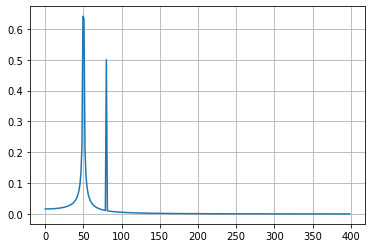

In [16]:
from scipy.fft import fft, fftfreq
import numpy as np
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

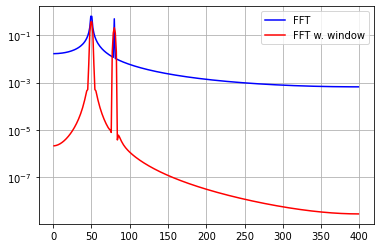

In [17]:
from scipy.fft import fft, fftfreq
import numpy as np
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
from scipy.signal.windows import blackman
w = blackman(N)
ywf = fft(y*w)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()

In [18]:
from scipy.fft import fftfreq
freq = fftfreq(8, 0.125)
freq

array([ 0.,  1.,  2.,  3., -4., -3., -2., -1.])

In [19]:
from scipy.fft import fftshift
x = np.arange(8)
fftshift(x)

array([4, 5, 6, 7, 0, 1, 2, 3])

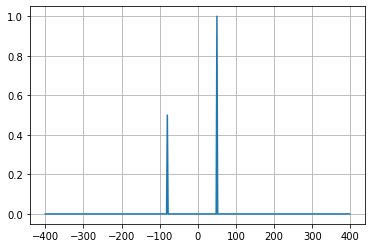

In [20]:
from scipy.fft import fft, fftfreq, fftshift
import numpy as np
# number of signal points
N = 400
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.exp(50.0 * 1.j * 2.0*np.pi*x) + 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.grid()
plt.show()

In [29]:
from scipy.fft import fft, rfft, irfft
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5, 1.0])
print('fft(x):',fft(x))
#array([ 5.5 +0.j        ,  2.25-0.4330127j , -2.75-1.29903811j,
#        1.5 +0.j        , -2.75+1.29903811j,  2.25+0.4330127j ])
yr = rfft(x)
print('rft(x):',yr)
#array([ 5.5 +0.j        ,  2.25-0.4330127j , -2.75-1.29903811j,
#        1.5 +0.j        ])
print('irfft(yr):',irfft(yr))
#array([ 1. ,  2. ,  1. , -1. ,  1.5,  1. ])
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
print('fft(x):',fft(x))
#array([ 4.5       +0.j        ,  2.08155948-1.65109876j,
#       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
#        2.08155948+1.65109876j])
yr = rfft(x)
print('yr:',yr)
#array([ 4.5       +0.j        ,  2.08155948-1.65109876j,
#        -1.83155948+1.60822041j])

fft(x): [ 5.5 -0.j          2.25-0.4330127j  -2.75-1.29903811j  1.5 -0.j
 -2.75+1.29903811j  2.25+0.4330127j ]
rft(x): [ 5.5 +0.j          2.25-0.4330127j  -2.75-1.29903811j  1.5 +0.j        ]
irfft(yr): [ 1.   2.   1.  -1.   1.5  1. ]
fft(x): [ 4.5       -0.j          2.08155948-1.65109876j -1.83155948+1.60822041j
 -1.83155948-1.60822041j  2.08155948+1.65109876j]
yr: [ 4.5       +0.j          2.08155948-1.65109876j -1.83155948+1.60822041j]


In [22]:
irfft(yr)

array([ 1.70788987,  2.40843925, -0.37366961,  0.75734049])

In [23]:
irfft(yr, n=len(x))

array([ 1. ,  2. ,  1. , -1. ,  1.5])

Autocorrelación: [286.2955063282335, 241.92707645069453, 236.82548412881397, 235.38171261781343, 236.94186887801771, 229.2853379765865, 225.1804507344063, 219.2833886220435, 211.68946752035976, 201.93082817910954, 193.0077163738947, 184.68889962831548, 175.83321588038388, 166.3635858216664, 153.0739943583373, 140.4381348431593, 132.52050057379958, 119.40051997794879, 105.86191419036422, 90.31700301284322, 78.16383609303885, 64.03832525752235, 51.749688065732606, 33.50177994410239, 19.123950617879956, 8.005895731289055, -4.7124174941812775, -18.94196699408837, -35.790852197076504, -48.18470903802555, -59.67787985609281, -74.97688667506308, -90.25668379580546, -101.98755451002592, -115.39898250749123, -125.5202953062422, -134.96324234304595, -150.27521395967153, -154.66561167445855, -165.11127420139397, -176.5796023351266, -185.33223465669442, -193.43518611159715, -198.43879678213713, -203.02076723078866, -205.42335939306466, -207.92372100292005, -212.32308269318472, -217.0594494098648, 

<function matplotlib.pyplot.show(close=None, block=None)>

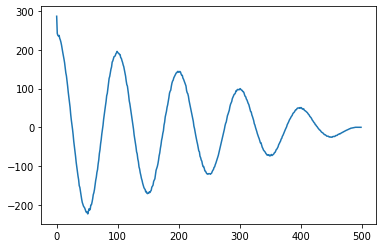

In [170]:
def autocorrelacion(signal):
    n = len(signal)
    autocorr = []
    for lag in range(n):
        suma = 0
        for i in range(n - lag):
            suma += signal[i] * signal[i + lag]
        autocorr.append(suma)
    return autocorr

# Ejemplo de uso
mi_signal = data
autocorr_resultado = autocorrelacion(mi_signal)
print("Autocorrelación:", autocorr_resultado)

plt.plot(autocorr_resultado)
plt.show

In [159]:
senal = amplitud * np.sin(2 * np.pi * frecuencia * tiempo + fase)
data = senal_ruidosa
# Delay (lag) range that we are interesting in
lags = range(500)

In [160]:
''' Python implementación'''

# Pre-allocate autocorrelation table
acorr = len(lags) * [0]

# Mean
mean = sum(data) / len(data) 

# Variance
var = sum([(x - mean)**2 for x in data]) / len(data) 

# Normalized data
ndata = [x - mean for x in data]


# Go through lag components one-by-one
for l in lags:
    c = 1 # Self correlation
    
    if (l > 0):
        tmp = [ndata[l:][i] * ndata[:-l][i] 
               for i in range(len(data) - l)]
        
        c = sum(tmp) / len(data) / var
        
    acorr[l] = c

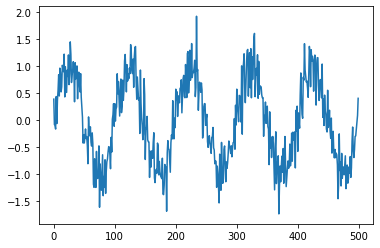

In [161]:
import matplotlib.pyplot as plt

# Plotear el array
plt.plot(data)

# Mostrar el gráfico
plt.show()


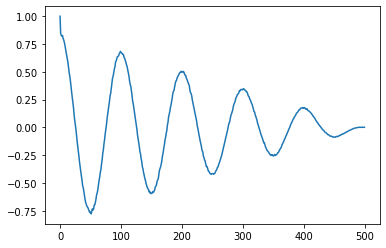

In [165]:
import matplotlib.pyplot as plt

# Plotear el array
plt.plot(acorr)

# Mostrar el gráfico
plt.show()


In [155]:
import numpy as np
import matplotlib.pyplot as plt

def senal_con_ruido(amplitud, frecuencia, fase, muestras, desvio):
    # Generar una señal sinusoidal
    tiempo = np.linspace(0, 1, muestras)
    senal = amplitud * np.sin(2 * np.pi * frecuencia * tiempo + fase)
    
    # Generar ruido gaussiano
    ruido = np.random.normal(0, desvio, muestras)
    
    # Sumar el ruido a la señal
    senal_con_ruido = senal + ruido
    
    return tiempo, senal_con_ruido

# Parámetros de la señal
amplitud = 1.0
frecuencia = 5.0
fase = 0.0
muestras = 500
desvio = 0.3  # Desviación estándar del ruido gaussiano

# Generar la señal con ruido
tiempo, senal_ruidosa = senal_con_ruido(amplitud, frecuencia, fase, muestras, desvio)



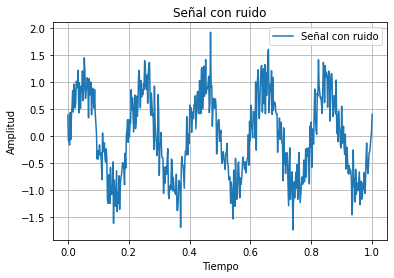

In [156]:
#Ploteo señal con ruido
plt.plot(tiempo, senal_ruidosa, label='Señal con ruido')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal con ruido')
plt.legend()
plt.grid(True)
plt.show()

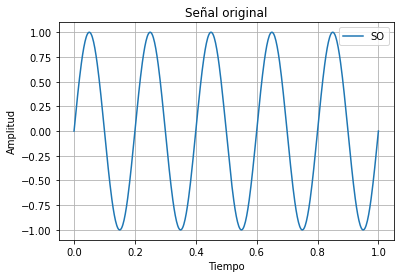

In [157]:
#Ploteo señal original
plt.plot(tiempo, amplitud * np.sin(2 * np.pi * frecuencia * tiempo + fase), label='SO') 
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.title('Señal original')
plt.legend()
plt.grid(True)
plt.show()